In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
test_file = pd.read_csv('C:/Users/lokesh/Desktop/Kaggle/House Price Pred/Data Set/test.csv')
train_file = pd.read_csv('C:/Users/lokesh/Desktop/Kaggle/House Price Pred/Data Set/train.csv')

In [3]:
pd.set_option('display.max_columns', None)
print(train_file.shape)
train_file.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


#### Data Information
- Null value finding
- Table Information
- 5pt Summary

In [4]:
train_file[[i for i in train_file.columns if train_file[i].isnull().sum()>0]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
#Table Information
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_file.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Feature Engineering - Data Cleaning and creating an ADS for Analysis

In [7]:
#if the columns having more than 50% of missing values, then i'm removing it
train_file = train_file.drop(['Id', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [8]:

# As per our data, if Bmst value is Not available -> No basement, Garage value is Not available -> No Garage, Alley Value is NA -> No alley Access
train_file['BsmtQual'] = np.where(train_file['BsmtQual'].isnull() == True, "No Basement", train_file['BsmtQual'])
train_file['BsmtCond'] = np.where(train_file['BsmtCond'].isnull() == True, "No Basement", train_file['BsmtCond'])
train_file['BsmtExposure'] = np.where(train_file['BsmtExposure'].isnull() == True, "No Basement", train_file['BsmtExposure'])
train_file['BsmtFinType1'] = np.where(train_file['BsmtFinType1'].isnull() == True, "No Basement", train_file['BsmtFinType1'])
train_file['BsmtFinType2'] = np.where(train_file['BsmtFinType2'].isnull() == True, "No Basement", train_file['BsmtFinType2'])


train_file['Alley'] = np.where(train_file['Alley'].isnull() == True, "No Alley Access", train_file['Alley'])


train_file['GarageType'] = np.where(train_file['GarageType'].isnull() == True, "No Garage", train_file['GarageType'])
train_file['GarageYrBlt'] = np.where(train_file['GarageYrBlt'].isnull() == True, "No Garage", train_file['GarageYrBlt'])
train_file['GarageFinish'] = np.where(train_file['GarageFinish'].isnull() == True, "No Garage", train_file['GarageFinish'])
train_file['GarageQual'] = np.where(train_file['GarageQual'].isnull() == True, "No Garage", train_file['GarageQual'])
train_file['GarageCond'] = np.where(train_file['GarageCond'].isnull() == True, "No Garage", train_file['GarageCond'])

In [9]:
#Replace the grouped mode value of MasVnrType, Elecctrical, MasVnrArea
train_file['MasVnrType'] = train_file.groupby(['YearBuilt'], sort=False)['MasVnrType'].apply(lambda x: x.fillna(x.mode().iloc[0]))
train_file['Electrical'] = train_file.groupby(['YearBuilt'], sort=False)['Electrical'].apply(lambda x: x.fillna(x.mode().iloc[0]))
train_file['MasVnrArea'] = train_file['MasVnrArea'].fillna(train_file.groupby(['YearBuilt'])['MasVnrArea'].transform('mean'))

#### Treating the Null Values for LotFrontage 
- In our dataset, We have 259 null values for lotfrontage, if we replace with mean/median or some random values, It might effects on accuracy or model performance. To make model more efficiency, I'm predicting the value by consdering the relavent parameters of lotfrontage.
- Here I'm making LotFrontage as a dependent variable and rest all are independent variables. All the null values of LotFrontage, I'm considering as test dataset. So that we can predict the missing values.

In [10]:
train_LotFrontage_main = train_file[train_file.LotFrontage.isnull() != True]
test_LotFrontage_main = train_file[train_file.LotFrontage.isnull() == True]


test_LotFrontage = test_LotFrontage_main.drop('LotFrontage', axis = 1)
train_LotFrontage_xtrain = train_LotFrontage_main[['LotArea', 'Street', 'LotShape', 'LandSlope', 'LotConfig', 'HouseStyle', 'GarageArea']]
train_LotFrontage_ytrain = train_LotFrontage_main['LotFrontage']

test_LotFrontage = test_LotFrontage[['LotArea', 'Street', 'LotShape', 'LandSlope', 'LotConfig', 'HouseStyle', 'GarageArea']]

Before training the model, we make sure that all the features are in the form of int or float. But we have categorical features in our dataset. For "Logconig, Street" I'm used one hot enoding because those two columns are nominal categories for for "LotShape, LandSlope, HouseStyle" I'm used ordinal encoding technique.

In [11]:
#Lotconfig and Street are falls under Nominal category. So, I used nominal encoding technique to convert it to integer
train_LotFrontage_xtrain_Nomina_Encoding = pd.get_dummies(train_LotFrontage_xtrain[['LotConfig', 'Street']])
train_LotFrontage_xtrain = pd.concat([train_LotFrontage_xtrain, train_LotFrontage_xtrain_Nomina_Encoding], 1)
train_LotFrontage_xtrain = train_LotFrontage_xtrain.drop(['LotConfig', 'Street'], axis = 1)

#LotShape, LandSlope and HouseStyle are falls under Ordinal category. So, I used Ordinal encoding technique to convert it to integer
train_LotFrontage_xtrain['LotShape'] = train_LotFrontage_xtrain.LotShape.map({'IR3':0, 'IR2':1, 'IR1': 2, 'Reg': 3})
train_LotFrontage_xtrain['LandSlope'] = train_LotFrontage_xtrain.LandSlope.map({'Sev':0, 'Mod':1, 'Gtl': 2})
train_LotFrontage_xtrain['HouseStyle'] = train_LotFrontage_xtrain.HouseStyle.map({'1Story':0, '1.5Fin':1, '1.5Unf': 2, '2Story':3, '2.5Fin':4, '2.5Unf': 5, 'SFoyer':6, 'SLvl':7})
train_LotFrontage_xtrain = train_LotFrontage_xtrain.drop('LotConfig_FR3', axis = 1)

In [12]:
#Lotconfig and Street are falls under Nominal category. So, I used nominal encoding technique to convert it to integer
test_LotFrontage_Nomina_Encoding = pd.get_dummies(test_LotFrontage[['LotConfig', 'Street']])
test_LotFrontage = pd.concat([test_LotFrontage, test_LotFrontage_Nomina_Encoding], 1)
test_LotFrontage = test_LotFrontage.drop(['LotConfig', 'Street'], axis = 1)

#LotShape, LandSlope and HouseStyle are falls under Ordinal category. So, I used Ordinal encoding technique to convert it to integer
test_LotFrontage['LotShape'] = test_LotFrontage.LotShape.map({'IR3':0, 'IR2':1, 'IR1': 2, 'Reg': 3})
test_LotFrontage['LandSlope'] = test_LotFrontage.LandSlope.map({'Sev':0, 'Mod':1, 'Gtl': 2})
test_LotFrontage['HouseStyle'] = test_LotFrontage.HouseStyle.map({'1Story':0, '1.5Fin':1, '1.5Unf': 2, '2Story':3, '2.5Fin':4, '2.5Unf': 5, 'SFoyer':6, 'SLvl':7})

In [13]:
#By using Random Forest Algorithm I replaced the missing values of LotFrontage with predicted values
reg_rf = RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)
reg_rf.fit(train_LotFrontage_xtrain, train_LotFrontage_ytrain)
y_pred= reg_rf.predict(test_LotFrontage)
test_LotFrontage_main['LotFrontage'] = y_pred
print("Accuracy on Traing set: ",reg_rf.score(train_LotFrontage_xtrain,train_LotFrontage_ytrain))

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Accuracy on Traing set:  0.9368010995903698


In [14]:

train_file = test_LotFrontage_main.append(train_LotFrontage_main).sort_index()
print(train_file[[i for i in train_file.columns if train_file[i].isnull().sum()>0]].isnull().sum())
train_file.head(3)

Series([], dtype: float64)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


### Feature Selection-Information gain - mutual information In Regression Problem Statements

- Feature Selection-Information gain - mutual information In Regression Problem Statements Mutual Information

- Estimate mutual information for a continuous target variable.

- Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

- The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

- Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.


In [15]:
train_file = train_file[['LotFrontage','LotArea','Alley','LotShape','Utilities','LandSlope','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','YrSold', 'SalePrice']]

In [16]:
train_file['Alley'] = np.where(train_file['Alley'] == 'No Alley Access', 0, 1)
train_file['LotShape'] = train_file.LotShape.map({'IR3':0, 'IR2':1, 'IR1': 2, 'Reg': 3})
train_file['Utilities'] = train_file.Utilities.map({'ELO':0, 'NoSeWa':1, 'NoSewr': 2, 'AllPub': 3})
train_file['LandSlope'] = train_file.LandSlope.map({'Sev':0, 'Mod':1, 'Gtl': 2})
train_file['HouseStyle'] = train_file.HouseStyle.map({'1Story':0, '1.5Fin':1, '1.5Unf': 2, '2Story':3, '2.5Fin':4, '2.5Unf': 5, 'SFoyer':6, 'SLvl':7})
train_file['ExterQual'] = train_file.ExterQual.map({'Po':0, 'Fa':1, 'TA': 2, 'Gd': 3,'Ex': 4})
train_file['ExterCond'] = train_file.ExterCond.map({'Po':0, 'Fa':1, 'TA': 2, 'Gd': 3,'Ex': 4})
train_file['BsmtQual'] = train_file.BsmtQual.map({'Po':1, 'Fa':2, 'TA': 3, 'Gd': 4,'Ex': 5, 'No Basement': 0})
train_file['BsmtCond'] = train_file.BsmtCond.map({'Po':1, 'Fa':2, 'TA': 3, 'Gd': 4,'Ex': 5, 'No Basement': 0})
train_file['BsmtExposure'] = train_file.BsmtExposure.map({'No Basement':0, 'No':1, 'Mn': 2, 'Av': 3,'Gd': 4})
train_file['BsmtFinType1'] = train_file.BsmtFinType1.map({'Unf':1, 'LwQ':2, 'Rec': 3, 'BLQ': 4,'ALQ': 5,'GLQ': 6, 'No Basement': 0})
train_file['BsmtFinType2'] = train_file.BsmtFinType2.map({'Unf':1, 'LwQ':2, 'Rec': 3, 'BLQ': 4,'ALQ': 5,'GLQ': 6, 'No Basement': 0})
train_file['HeatingQC'] = train_file.HeatingQC.map({'Po':0, 'Fa':1, 'TA': 2, 'Gd': 3,'Ex': 4})
train_file['CentralAir'] = np.where(train_file['CentralAir'] == 'Y', 1, 0)
train_file['KitchenQual'] = train_file.KitchenQual.map({'Po':0, 'Fa':1, 'TA': 2, 'Gd': 3,'Ex': 4})
train_file['GarageQual'] = train_file.GarageQual.map({'Po':1, 'Fa':2, 'TA': 3, 'Gd': 4,'Ex': 5, 'No Garage': 0})
train_file['GarageCond'] = train_file.GarageCond.map({'Po':1, 'Fa':2, 'TA': 3, 'Gd': 4,'Ex': 5, 'No Garage': 0})
train_file['PavedDrive'] = train_file.PavedDrive.map({'N':0, 'P':1, 'Y': 2})

train_file['YearBuilt'] = train_file['YrSold'] - train_file['YearBuilt']
train_file['YearRemodAdd'] = train_file['YrSold'] - train_file['YearRemodAdd']

train_file = train_file.rename(columns={"YearBuilt": "BuiltYearsBack", "YearRemodAdd": "RemodYearsBack"})
print(train_file.shape)
train_file.head(3)

(1460, 50)


,LotFrontage,LotArea,Alley,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,BuiltYearsBack,RemodYearsBack,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
0,65.0,8450,0,3,3,2,3,7,5,5,5,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,2,548,3,3,2,0,61,0,0,0,0,2008,208500
1,80.0,9600,0,3,3,2,0,6,8,31,31,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,2,460,3,3,2,298,0,0,0,0,0,2007,181500
2,68.0,11250,0,2,3,2,3,7,5,7,6,3,2,4,3,2,6,486,1,0,434,920,4,1,920,866,0,1786,1,0,2,1,3,1,3,6,1,2,608,3,3,2,0,42,0,0,0,0,2008,223500


In [17]:
# Spliting data for training the model. Splitting the data will be done at the begining of feature seletion phase
X = train_file.drop('SalePrice', axis = 1)
y = train_file['SalePrice']
X_train, X_test, Y_train, Y_test = tts(X, y, test_size=0.20,random_state=42)

In [18]:
X_train.shape

(1168, 49)

Scaled the data for each metrics by using feature scaling techniques to reduce the bias, to normalize the data within a range and speeding up the calculation while training the model. After applying the Standard Scaler, data range is in between -3 to 3


In [19]:
Standardscaler = StandardScaler()
X_train_col = X_train.columns
X_train_ADS = pd.DataFrame(Standardscaler.fit_transform(X_train),columns = X_train_col )
X_train_ADS.head(2)

,LotFrontage,LotArea,Alley,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,BuiltYearsBack,RemodYearsBack,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold
0,-0.042323,-0.212896,-0.26008,0.713803,0.029273,0.221711,-0.806774,-0.820445,0.372217,0.526141,1.452679,-0.687421,2.520919,-0.566201,0.110144,-0.587727,-0.255787,1.037269,-0.27716,-0.285504,-0.400282,0.572612,-1.168292,0.276582,0.374235,-0.801923,-0.118999,-0.407093,1.105320,-0.24287,-1.055566,-0.764098,0.136218,-0.212757,-0.767076,-0.964566,-0.958592,-1.056544,-0.863837,0.253143,0.25801,0.292826,1.188402,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,1.650065
1,-0.499722,-0.265245,-0.26008,-0.980753,0.029273,0.221711,0.729605,-0.088934,1.268609,-0.679464,-0.382563,1.054244,-0.241214,0.585929,0.110144,-0.587727,-1.208766,-0.971996,-0.27716,-0.285504,0.511920,-0.596547,-0.132176,0.276582,-0.958202,0.955088,-0.118999,0.083170,-0.818694,-0.24287,0.773664,1.236947,0.136218,-0.212757,-0.767076,0.270755,0.592150,0.295092,-0.456264,0.253143,0.25801,0.292826,-0.740157,-0.138015,-0.351921,-0.121008,-0.275838,-0.070993,0.893677


In [20]:
# determine the mutual information
mutual_info = mutual_info_regression(X_train_ADS.fillna(0), Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_ADS.columns
mutual_info.sort_values(ascending=False)

#Considering the columns for training the model which are atleast 10% of information shared with dependent variable/feature
Req_Cols = list(mutual_info[mutual_info>0.1].index)
Req_Cols

['LotFrontage',
 'LotArea',
 'HouseStyle',
 'OverallQual',
 'BuiltYearsBack',
 'RemodYearsBack',
 'ExterQual',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF']

In [21]:
#Creating the Training ADS with selected columns
Train_ADS = X_train_ADS[Req_Cols]
Train_ADS.head(3)

,LotFrontage,LotArea,HouseStyle,OverallQual,BuiltYearsBack,RemodYearsBack,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF
0,-0.042323,-0.212896,-0.806774,-0.820445,0.526141,1.452679,-0.687421,-0.566201,-0.255787,1.037269,-0.400282,0.572612,-1.168292,0.374235,-0.801923,-0.407093,-1.055566,-0.767076,-0.964566,-0.958592,-1.056544,-0.863837,-0.714352
1,-0.499722,-0.265245,0.729605,-0.088934,-0.679464,-0.382563,1.054244,0.585929,-1.208766,-0.971996,0.511920,-0.596547,-0.132176,-0.958202,0.955088,0.083170,0.773664,-0.767076,0.270755,0.592150,0.295092,-0.456264,-0.138015
2,-0.167068,-0.177841,-0.806774,-0.820445,1.992419,1.694159,-0.687421,-1.718330,-1.208766,-0.971996,0.505196,-0.603357,-0.132176,-0.965964,-0.801923,-1.395250,-1.055566,-0.767076,-1.582227,-0.958592,-2.408179,-2.257169,-0.714352


In [22]:
#Applying Scaling technique to Test Dataset
Standardscaler = StandardScaler()
X_test_col = X_test.columns
X_test_ADS = pd.DataFrame(Standardscaler.fit_transform(X_test),columns = X_test_col )

#Creating the Testing ADS with selected columns
Test_ADS = X_test_ADS[Req_Cols]
print(Test_ADS.shape)
Test_ADS.head(2)


(292, 23)


,LotFrontage,LotArea,HouseStyle,OverallQual,BuiltYearsBack,RemodYearsBack,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF
0,0.044673,-0.240216,-0.772194,-0.007138,0.270734,-0.986382,-0.698374,-0.527885,1.129908,0.515662,-0.372970,0.044012,-1.305050,-0.175856,-0.768780,-0.75854,-0.916735,-0.787350,-0.209302,-0.922263,-0.917665,-0.874821,-0.700238
1,1.344139,0.413601,0.761688,1.382350,-0.682152,-0.396472,1.044576,1.674149,1.129908,1.346949,-0.290257,0.982892,0.841849,0.946035,1.880735,2.19051,0.856025,0.695916,1.624185,2.191042,0.376819,1.126763,-0.059770


In [23]:
Test_ADS_Main = pd.concat([Test_ADS,Y_test],1)
print(Test_ADS_Main.shape)
Test_ADS_Main.head()

(531, 24)


,LotFrontage,LotArea,HouseStyle,OverallQual,BuiltYearsBack,RemodYearsBack,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,SalePrice
0,0.044673,-0.240216,-0.772194,-0.007138,0.270734,-0.986382,-0.698374,-0.527885,1.129908,0.515662,-0.372970,0.044012,-1.305050,-0.175856,-0.768780,-0.758540,-0.916735,-0.787350,-0.209302,-0.922263,-0.917665,-0.874821,-0.700238,NaN
1,1.344139,0.413601,0.761688,1.382350,-0.682152,-0.396472,1.044576,1.674149,1.129908,1.346949,-0.290257,0.982892,0.841849,0.946035,1.880735,2.190510,0.856025,0.695916,1.624185,2.191042,0.376819,1.126763,-0.059770,NaN
2,-0.605060,-0.147300,-0.772194,-0.701882,1.682416,1.815690,-0.698374,-0.527885,-1.206729,-0.977951,1.073328,-0.074510,-0.231600,-0.279735,-0.768780,-0.834449,-0.916735,-0.787350,-0.820464,0.634389,0.376819,-0.445910,-0.700238,NaN
3,-0.883516,-0.821198,-0.260900,-0.007138,0.835407,1.619054,-0.698374,-0.527885,0.662581,-0.079080,0.120946,-0.083806,0.841849,-0.342062,0.789758,0.372498,0.856025,-0.787350,0.401860,2.191042,0.376819,-0.177841,-0.219887,NaN
4,0.926453,0.522855,-0.772194,2.077094,-1.176241,-1.084700,1.044576,1.674149,1.129908,1.324421,0.104403,1.347753,0.841849,1.257672,-0.768780,0.288999,0.856025,2.179182,-0.209302,0.634389,1.671302,2.020328,-0.700238,NaN


### Linear regression

In [24]:
linear_reg = LinearRegression()
linear_reg.fit(Train_ADS, Y_train)
y_pred= linear_reg.predict(Test_ADS)
score_1=r2_score(Y_test,y_pred)
print("Accuracy on Traing set: ",linear_reg.score(Train_ADS,Y_train))
print("Accuracy on Testing set: ",linear_reg.score(Test_ADS,Y_test))
print("R2 score", score_1)

Accuracy on Traing set:  0.8009623620879747
Accuracy on Testing set:  0.8238278675762611
R2 score 0.8238278675762611


In linear reegression we didn't obtain good acuracy. So, Lets try with another alogorithm: RandomForest Regressor

## KNeighbors Regressor 

In [25]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(Train_ADS, Y_train)
y_pred= neigh.predict(Test_ADS)
score_1=r2_score(Y_test,y_pred)
print("Accuracy on Traing set: ",neigh.score(Train_ADS,Y_train))
print("Accuracy on Testing set: ",neigh.score(Test_ADS,Y_test))
print("R2 score", score_1)

Accuracy on Traing set:  0.9314846170773917
Accuracy on Testing set:  0.8786289769564338
R2 score 0.8786289769564338


Compare with Linear regressor, accuracy for KNN with K=2 is better. So I performed hyper parameter tunning to find the optimal K value

Max Accuracy error:- 0.8817799869909974 at K = 3


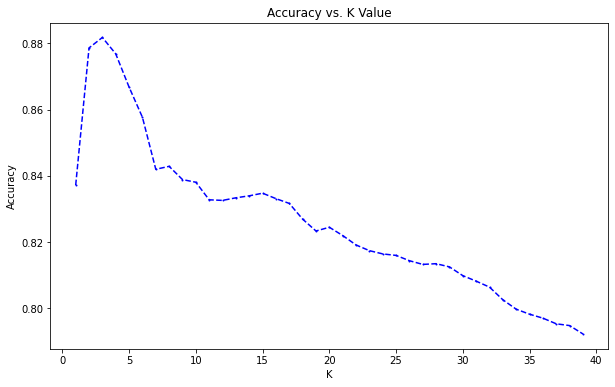

In [26]:
Score = []
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(Train_ADS, Y_train)
    pred_i = knn.predict(Test_ADS)
    score_1=r2_score(Y_test,pred_i)
    Score.append(score_1)

plt.figure(figsize=(10,6))
plt.plot(range(1,40),Score,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=1)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Max Accuracy error:-",max(Score),"at K =",Score.index(max(Score))+1)

After hyper parameter tuning we obtain good acuracy. But, Lets try with another alogorithm: RandomForest Regressor

### RandomForest Regressor 

In [27]:
reg_rf = RandomForestRegressor()
reg_rf.fit(Train_ADS, Y_train)
y_pred= reg_rf.predict(Test_ADS)
score_1=r2_score(Y_test,y_pred)
print("Accuracy on Traing set: ",reg_rf.score(Train_ADS,Y_train))
print("Accuracy on Testing set: ",reg_rf.score(Test_ADS,Y_test))
print("R2 score", score_1)

Accuracy on Traing set:  0.9764553665964971
Accuracy on Testing set:  0.9022168697180725
R2 score 0.9022168697180725


In RandomForest Regressor, accuracy is comparitively better than than above two models. To improve the accuracy, hyperparameter tuing is performed

In [28]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 40)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20,25,30,35,40,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(Train_ADS, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1805; total time=   4.2s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1805; total time=   4.0s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1805; total time=   4.2s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1805; total time=   4.4s
[CV] END max_depth=33, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=1805; total time=   5.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1074; total time=   7.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=1074; total time=   5.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 12, 19, 26, 33, 40],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 30, 35, 40,
                                                              100],
                                        'n_estimators': [100, 148, 197, 246,
                                                         294, 343, 392, 441,
                                                         489, 538, 587, 635,
                                                         684, 733, 782, 830,
                                                         879, 928, 976, 1025,
                                                         1074, 1123, 1171, 1220,
          

In [29]:
rf_random.best_params_

{'n_estimators': 1220,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 33}

In [30]:
reg_rf = RandomForestRegressor(n_estimators=1220,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=33)
reg_rf.fit(Train_ADS, Y_train)
y_pred= reg_rf.predict(Test_ADS)
score_1=r2_score(Y_test,y_pred)
print("Accuracy on Traing set: ",reg_rf.score(Train_ADS,Y_train))
print("Accuracy on Testing set: ",reg_rf.score(Test_ADS,Y_test))
print("R2 score", score_1)

Accuracy on Traing set:  0.9796795731912034
Accuracy on Testing set:  0.8964305852667543
R2 score 0.8964305852667543


### XGB Regressor

In [31]:
#!pip install xgboost
import xgboost as XGB

xgb_model = XGB.XGBRegressor()
xgb_model.fit(Train_ADS, Y_train)
y_pred= xgb_model.predict(Test_ADS)
score_1=r2_score(Y_test,y_pred)
print("Accuracy on Traing set: ",xgb_model.score(Train_ADS,Y_train))
print("Accuracy on Testing set: ",xgb_model.score(Test_ADS,Y_test))
print("R2 score", score_1)

Accuracy on Traing set:  0.9996201667894815
Accuracy on Testing set:  0.8510667103021626
R2 score 0.8510667103021626


In [32]:
learning_rate = [0.01, 0.1]
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
min_child_weight = [int(x) for x in np.linspace(1, 20, num = 6)]
subsample =  [0.5, 0.7]
colsample_bytree = [0.5, 0.7]
objective = ['reg:squarederror']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 40)]


random_grid = {'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'objective': objective,
               'n_estimators': n_estimators}


rf_random = RandomizedSearchCV(estimator = xgb_model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(Train_ADS, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=26, min_child_weight=1, n_estimators=1805, objective=reg:squarederror, subsample=0.5; total time=  12.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=26, min_child_weight=1, n_estimators=1805, objective=reg:squarederror, subsample=0.5; total time=  11.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=26, min_child_weight=1, n_estimators=1805, objective=reg:squarederror, subsample=0.5; total time=  12.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=26, min_child_weight=1, n_estimators=1805, objective=reg:squarederror, subsample=0.5; total time=  13.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=26, min_child_weight=1, n_estimators=1805, objective=reg:squarederror, subsample=0.5; total time=  11.8s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=12, min_child_weight=16, n_estimators=1561, obje

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_par...
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 12, 19, 26, 33, 40],

In [33]:
rf_random.best_params_

{'subsample': 0.5,
 'objective': 'reg:squarederror',
 'n_estimators': 1561,
 'min_child_weight': 16,
 'max_depth': 12,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5}

In [34]:
xgb_model = XGB.XGBRegressor(subsample=0.5, objective='reg:squarederror', n_estimators=1561, min_child_weight=16, max_depth=12, learning_rate=0.01, colsample_bytree=0.5)
xgb_model.fit(Train_ADS, Y_train)
y_pred= xgb_model.predict(Test_ADS)
score_1=r2_score(Y_test,y_pred)
print("Accuracy on Traing set: ",xgb_model.score(Train_ADS,Y_train))
print("Accuracy on Testing set: ",xgb_model.score(Test_ADS,Y_test))
print("R2 score", score_1)

Accuracy on Traing set:  0.9604127487463735
Accuracy on Testing set:  0.8864674570042681
R2 score 0.8864674570042681


### Feature Engineering & Feature Selection For Test Dataset

In [35]:
test_file[[i for i in test_file.columns if test_file[i].isnull().sum()>0]].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [36]:
test_file['BuiltYearsBack'] = test_file['YrSold'] - test_file['YearBuilt']
test_file['RemodYearsBack'] = test_file['YrSold'] - test_file['YearRemodAdd']

train_LotFrontage_main = test_file[test_file.LotFrontage.isnull() != True]
test_LotFrontage_main = test_file[test_file.LotFrontage.isnull() == True]


test_LotFrontage = test_LotFrontage_main.drop('LotFrontage', axis = 1)
train_LotFrontage_xtrain = train_LotFrontage_main[['LotArea', 'Street', 'LotShape', 'LandSlope', 'LotConfig', 'HouseStyle', 'GarageArea']]
train_LotFrontage_ytrain = train_LotFrontage_main['LotFrontage']

test_LotFrontage = test_LotFrontage[['LotArea', 'Street', 'LotShape', 'LandSlope', 'LotConfig', 'HouseStyle', 'GarageArea']]

#Lotconfig and Street are falls under Nominal category. So, I used nominal encoding technique to convert it to integer
train_LotFrontage_xtrain_Nomina_Encoding = pd.get_dummies(train_LotFrontage_xtrain[['LotConfig', 'Street']])
train_LotFrontage_xtrain = pd.concat([train_LotFrontage_xtrain, train_LotFrontage_xtrain_Nomina_Encoding], 1)
train_LotFrontage_xtrain = train_LotFrontage_xtrain.drop(['LotConfig', 'Street'], axis = 1)

#LotShape, LandSlope and HouseStyle are falls under Ordinal category. So, I used Ordinal encoding technique to convert it to integer
train_LotFrontage_xtrain['LotShape'] = train_LotFrontage_xtrain.LotShape.map({'IR3':0, 'IR2':1, 'IR1': 2, 'Reg': 3})
train_LotFrontage_xtrain['LandSlope'] = train_LotFrontage_xtrain.LandSlope.map({'Sev':0, 'Mod':1, 'Gtl': 2})
train_LotFrontage_xtrain['HouseStyle'] = train_LotFrontage_xtrain.HouseStyle.map({'1Story':0, '1.5Fin':1, '1.5Unf': 2, '2Story':3, '2.5Fin':4, '2.5Unf': 5, 'SFoyer':6, 'SLvl':7})
train_LotFrontage_xtrain = train_LotFrontage_xtrain.drop('LotConfig_FR3', axis = 1)

#Lotconfig and Street are falls under Nominal category. So, I used nominal encoding technique to convert it to integer
test_LotFrontage_Nomina_Encoding = pd.get_dummies(test_LotFrontage[['LotConfig', 'Street']])
test_LotFrontage = pd.concat([test_LotFrontage, test_LotFrontage_Nomina_Encoding], 1)
test_LotFrontage = test_LotFrontage.drop(['LotConfig', 'Street','LotConfig_FR3'], axis = 1)

#LotShape, LandSlope and HouseStyle are falls under Ordinal category. So, I used Ordinal encoding technique to convert it to integer
test_LotFrontage['LotShape'] = test_LotFrontage.LotShape.map({'IR3':0, 'IR2':1, 'IR1': 2, 'Reg': 3})
test_LotFrontage['LandSlope'] = test_LotFrontage.LandSlope.map({'Sev':0, 'Mod':1, 'Gtl': 2})
test_LotFrontage['HouseStyle'] = test_LotFrontage.HouseStyle.map({'1Story':0, '1.5Fin':1, '1.5Unf': 2, '2Story':3, '2.5Fin':4, '2.5Unf': 5, 'SFoyer':6, 'SLvl':7})


train_LotFrontage_xtrain[[i for i in train_LotFrontage_xtrain.columns if train_LotFrontage_xtrain[i].isnull().sum()>0]].isnull().sum()
test_file['GarageArea'] = test_file['GarageArea'].fillna(test_file.groupby('HouseStyle')['GarageArea'].transform('mean'))



In [37]:
#By using Random Forest Algorithm I replaced the missing values of LotFrontage with predicted values
reg_rf = RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)
reg_rf.fit(train_LotFrontage_xtrain.fillna(0), train_LotFrontage_ytrain)
y_pred= reg_rf.predict(test_LotFrontage)
test_LotFrontage_main['LotFrontage'] = y_pred
print("Accuracy on Traing set: ",reg_rf.score(train_LotFrontage_xtrain.fillna(0),train_LotFrontage_ytrain))




Test_ADS = test_LotFrontage_main.append(train_LotFrontage_main).sort_index()





Test_ADS = Test_ADS[Req_Cols]



Test_ADS['BsmtQual'] = np.where(Test_ADS['BsmtQual'].isnull() == True, "No Basement", Test_ADS['BsmtQual'])
Test_ADS['BsmtFinType1'] = np.where(Test_ADS['BsmtFinType1'].isnull() == True, "No Basement", Test_ADS['BsmtFinType1'])

Test_ADS['HouseStyle'] = Test_ADS.HouseStyle.map({'1Story':0, '1.5Fin':1, '1.5Unf': 2, '2Story':3, '2.5Fin':4, '2.5Unf': 5, 'SFoyer':6, 'SLvl':7})
Test_ADS['ExterQual'] = Test_ADS.ExterQual.map({'Po':0, 'Fa':1, 'TA': 2, 'Gd': 3,'Ex': 4})
Test_ADS['BsmtQual'] = Test_ADS.BsmtQual.map({'Po':1, 'Fa':2, 'TA': 3, 'Gd': 4,'Ex': 5, 'No Basement': 0})
Test_ADS['BsmtFinType1'] = Test_ADS.BsmtFinType1.map({'Unf':1, 'LwQ':2, 'Rec': 3, 'BLQ': 4,'ALQ': 5,'GLQ': 6, 'No Basement': 0})
Test_ADS['HeatingQC'] = Test_ADS.HeatingQC.map({'Po':0, 'Fa':1, 'TA': 2, 'Gd': 3,'Ex': 4})
Test_ADS['KitchenQual'] = Test_ADS.KitchenQual.map({'Po':0, 'Fa':1, 'TA': 2, 'Gd': 3,'Ex': 4})
Test_ADS.head(4)

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Accuracy on Traing set:  0.9520574359156476


,LotFrontage,LotArea,HouseStyle,OverallQual,BuiltYearsBack,RemodYearsBack,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF
0,80.0,11622,0,5,49,49,2,3,3,468.0,270.0,882.0,2,896,0,896,1,2.0,5,0,1.0,730.0,0
1,81.0,14267,0,6,52,52,2,3,5,923.0,406.0,1329.0,2,1329,0,1329,1,3.0,6,0,1.0,312.0,36
2,74.0,13830,3,5,13,12,2,4,6,791.0,137.0,928.0,3,928,701,1629,2,2.0,6,1,2.0,482.0,34
3,78.0,9978,3,6,12,12,2,3,6,602.0,324.0,926.0,4,926,678,1604,2,3.0,7,1,2.0,470.0,36


In [38]:
Test_ADS.shape

(1459, 23)

In [39]:
Test_col = Test_ADS.columns
Test_ADS = pd.DataFrame(Standardscaler.fit_transform(Test_ADS),columns = Test_col )
Test_ADS.head(2)

,LotFrontage,LotArea,HouseStyle,OverallQual,BuiltYearsBack,RemodYearsBack,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF
0,0.510063,0.363929,-0.776139,-0.751101,0.413784,1.178391,-0.678102,-0.49934,-0.253481,0.063273,-0.650396,-0.370681,-1.211189,-0.654561,-0.775254,-1.215588,-1.02872,-0.772410,-0.918335,-0.898055,-0.987674,1.185538,-0.701628
1,0.556220,0.897861,-0.776139,-0.054877,0.512398,1.320405,-0.678102,-0.49934,0.689960,1.063027,-0.339262,0.638925,-1.211189,0.433298,-0.775254,-0.323539,-1.02872,0.741264,-0.255371,-0.898055,-0.987674,-0.740959,-0.178826


In [40]:
Test_ADS[[i for i in Test_ADS.columns if Test_ADS[i].isnull().sum()>0]].isnull().sum()

BsmtFinSF1     1
BsmtUnfSF      1
TotalBsmtSF    1
KitchenQual    1
GarageCars     1
GarageArea     1
dtype: int64

In [41]:
#Applying Scaling technique to Test Dataset
Standardscaler = StandardScaler()
X_test_col = X.columns
Train_ADS = pd.DataFrame(Standardscaler.fit_transform(X),columns = X_test_col )

#Creating the Testing ADS with selected columns
Train_ADS = Train_ADS[Req_Cols]
print(Train_ADS.shape)
Train_ADS.head(2)
Y_train = y

(1460, 23)


In [42]:
xgb_model = XGB.XGBRegressor(subsample=0.5,  n_estimators=1561, min_child_weight=16, max_depth=12, learning_rate=0.01, colsample_bytree=0.5)
xgb_model.fit(Train_ADS, Y_train)
y_pred= xgb_model.predict(Test_ADS)

print("Accuracy on Traing set: ",xgb_model.score(Train_ADS,Y_train))


Accuracy on Traing set:  0.9644016770721294


In [43]:
test_file['Pred Price'] = y_pred

Sub_file = test_file[['Id','Pred Price']]
Sub_file.head(10)

,Id,Pred Price
0,1461,125872.031250
1,1462,167167.484375
2,1463,179672.734375
3,1464,188366.968750
4,1465,182108.296875
5,1466,178387.187500
6,1467,171879.343750
7,1468,173149.578125
8,1469,174478.468750
9,1470,121412.148438


I've tried with three algorithms (Linear Regression, KNN, Random Forest) and hyperparameter tuning for Xgb regressor. If you like the notebook the Please Upvote add up your comments to this nootebook Happy coding